ASKAP
===

100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


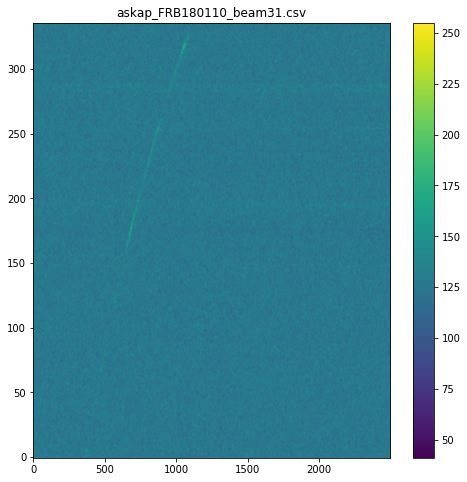

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import os
from tqdm import tqdm

folder = 'data/ASKAP_FRB180110/cutouts/FRB180110'


# beamfiles = list(filter(lambda s: '.csv' in s and 'askap' in s, os.listdir(folder)))
# beamfiles.sort()
beamfiles = ['askap_FRB180110_beam31.csv']
for beamfile in tqdm(beamfiles):
    timedata = []
    intensity = []
    with open('{}/{}'.format(folder, beamfile)) as infile:
        for line in infile:
            ti, rowi = float(line.split(' ')[0]), [float(x) for x in line.split(' ')[1:-1]]
            timedata.append(ti)
            intensity.append(rowi)

    timedata  = timedata[:-1]
    intensity = intensity[:-1] # last row is incomplete
    timedata  = np.array(timedata, dtype=float)
    intensity = np.array(intensity, dtype=float)
    intensity = intensity.transpose()
    
    plt.figure(figsize=(8,8))
    plt.title(beamfile)
    plt.imshow(intensity[:, 7500:10000], aspect='auto', origin='lower', interpolation='bicubic')
    plt.colorbar()
    

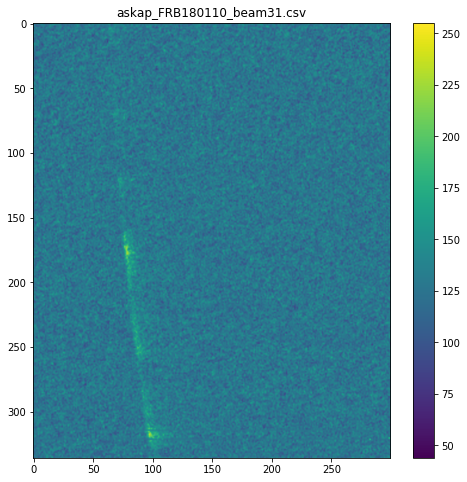

In [38]:
# Dedispersion
dedispersed = np.copy(intensity)
DM = 715.7 
shifts = [0 for i in range(0, len(intensity))]

nu_high = 1488
timestep = 1.265 # ms
for i, row in enumerate(dedispersed): 
    nu_low = nu_high - i
    deltat = 4.15e6 * (nu_low**-2 - nu_high**-2) * DM
    #print(deltat/timestep)
    channelshift = -int(deltat/timestep)
    dedispersed[i] = np.roll(dedispersed[i], channelshift)
    
plt.figure(figsize=(8,8))
plt.title(beamfile)
# plt.imshow(dedispersed[:, 7500:10000], aspect='auto', origin='upper', interpolation='bicubic')
plt.imshow(dedispersed[:, 7800:8100], aspect='auto', origin='upper', interpolation='bicubic')
plt.colorbar()
